# P2 Analyzing Data from Titanic Disaster
I choose the Titanic disaster data set since as a German I am not so familiar with baseball.

# Questions to be asked
The dataset provides information on the survival of the passengers included. I would like to check if the change of survival has been independent of the passengers sex.

Another question is how much the passengers paid in the various passengers classes. 

## The dataset
The dataset provided contains 891 entries representing 891 of the 2224 passengers and crew on board the Titanic. Since I could not find more information on the subset of passengers the data has been taken from I assume that the sample is representative for all passengers, when I draw my conclusions.

The survived flag indicates whether the respective person did survive. 62 % of the passengers, i.e. 549, did not survive the disaster.

In [1]:
# Importing libraries, general settings
import pandas as pd
import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
#Importing the data
fulldata = pd.read_csv("titanic-data.csv")
print "Number of rows:", len(fulldata)
print "Columns"
print fulldata.columns
n_passengers = len(fulldata)
print n_passengers


Number of rows: 891
Columns
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
891


In the following I check all the columns for strange data

In [3]:
# Print information on dataset:
fulldata.info()

# Print first few rows
fulldata.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The following table gives an overview over the information included in the dataset:

| Column name | Values | Description | Has missing values? | Example |
| --- | --- | --- | --- |
| PassengerId | 1 to 891]  | unique identifier for passengers | No | 1 |
| Survived | 0 or 1 | flag to indicate if passenger survived the disaster (1) or died (0) | No | 0 |
| PClass | 1,2 or 3 | Number of passenger class passengers was booked to | No | 3 |
| Name | string, full name | Full name of passenger | No | "Braund, Mr. Owen Harris" | 
| Sex | "female" or "male" | Sex of passenger | No | "male" |
| Age | age in years | Age of passenger. Ages for passenger older than a year are given in integer numbers. 0.5 have been added to indicate that the age has been estimated | Yes | 22.0 |
| SibSp | Integer | Number of sibling plus spouse aboard | No | 1 |
| Parch | Integer | Number of parents plus children aboard | No | 1 |
| Ticket | String, ticket number | Ticket "number" of the passenger | No | "A/5 21171" |
| Fare | Float | Passenger fare in pound | No | 71.2833 |
| Cabin | String | Cabin of passenger | No | "C85" |
| Embarked | "C", "Q" or "S" | C stands for Cherbourg, Q for Queenstown and S for Southampton | Yes | "S" |


Source: https://www.kaggle.com/c/titanic/data

In [4]:
# Calculate number of survivors
n_per_survival = fulldata.groupby("Survived").count()["PassengerId"]

# Function to convert series in percent of sum of series:
def convertToPercentOfColumn(series):
    colSum = sum(series)
    return series.apply(func=lambda col: col*100./colSum)

perc_per_survival = convertToPercentOfColumn(n_per_survival)

# Count survivors
print "Number of survivors:", n_per_survival[1], " (%.2f %%)" % (perc_per_survival[1])
print "Number of victims:", n_per_survival[0], " (%.2f %%)" % (perc_per_survival[0])

Number of survivors: 342  (38.38 %)
Number of victims: 549  (61.62 %)


61.62% of the passengers in the sample died.

In [5]:
n_per_sex = fulldata.groupby("Sex").count()["PassengerId"]
perc_per_sex = convertToPercentOfColumn(n_per_sex)

# Count female passengers
print "Number of female passengers:", n_per_sex["female"], " (%.2f %%)" % (perc_per_sex["female"])
print "Number of male passengers:", n_per_sex["male"], " (%.2f %%)" % (perc_per_sex["male"])

Number of female passengers: 314  (35.24 %)
Number of male passengers: 577  (64.76 %)


The dataset contains data from 577 men and 314 women. 

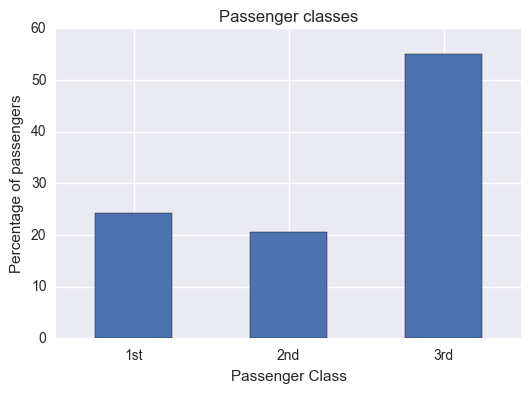

In [6]:
n_per_pclass = fulldata.groupby("Pclass").count()["PassengerId"]

# Plot percentage of customers per passenger class
perc_per_pclass = convertToPercentOfColumn(n_per_pclass)
ax = perc_per_pclass.plot.bar()
ax.set_ylabel("Percentage of passengers")
ax.set_xlabel("Passenger Class")
ax.set_xticklabels(["1st", "2nd", "3rd"], rotation=0)
ax.set_title("Passenger classes")

Most passengers, over 50 %, travelled in the 3rd class. Interestingly, more passengers booked the first class than the second class.

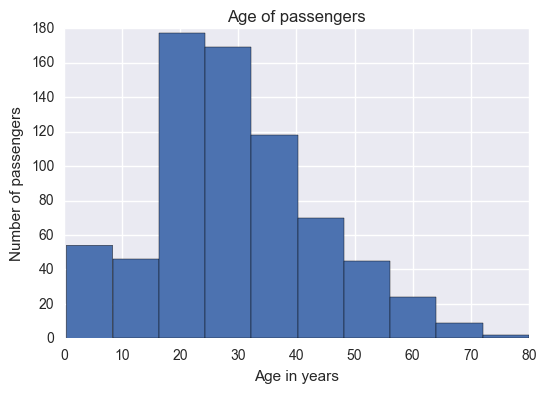

In [7]:
n_bins = int(math.ceil(fulldata["Age"].max()+1))
ax = fulldata["Age"].hist()
ax.set_xlabel("Age in years")
ax.set_ylabel("Number of passengers")
ax.set_title("Age of passengers")

In [8]:
print fulldata["Age"].describe()
n_missing_age = len(fulldata[fulldata["Age"].isnull()]["Age"])
print "Number of passengers with age missing: %.0f (%.2f %%)" % (n_missing_age, n_missing_age*100./len(fulldata) )

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64
Number of passengers with age missing: 177 (19.87 %)


C:\Users\Moritz\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


For 177 passengers (20 %) the age is missing. It looks a bit suspicious, that there is only one passenger age 23. This might be due to the selection of the subset of passengers but I was not able to find out more details about the subset. The mean age of the passengers is 29.7 years, while the mode is 24 (both calculated neglecting missing ages).

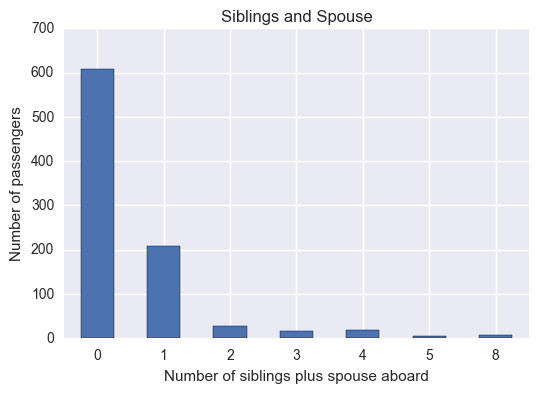

In [9]:
ax = fulldata.groupby("SibSp").count()["PassengerId"].plot.bar()
ax.set_ylabel("Number of passengers")
ax.set_xlabel("Number of siblings plus spouse aboard")
ax.set_title("Siblings and Spouse")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

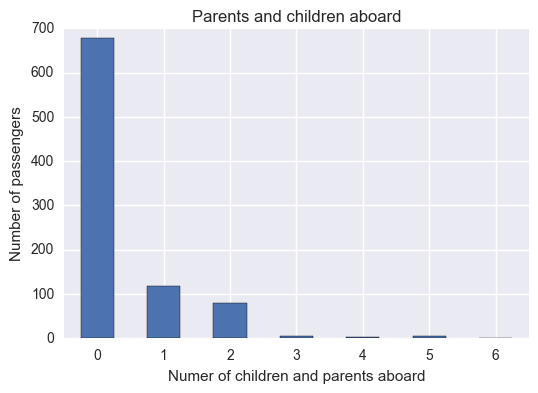

In [10]:
ax = fulldata.groupby("Parch").count()["PassengerId"].plot.bar()
ax.set_ylabel("Number of passengers")
ax.set_xlabel("Numer of children and parents aboard")
ax.set_title("Parents and children aboard")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

The dataset provides information about the number of relatives on board the Titanic. Only parents, children, siblings and spouse have been taken into account to build the data according to the description of the dataset.

Most of the passengers were traveling without spouse or close relatives, according to the data.

In [11]:
# Group data by ticket number and count number of passengers per ticket number
pass_per_ticket = fulldata.groupby("Ticket").count()

# Print ticket numbers for tickets that are shared between 7 or more people
family_tickets = pass_per_ticket[pass_per_ticket["PassengerId"]>=7].index.values
print "Tickets for more than six passengers:"
print family_tickets

# Print data for "family" tickets
print "\n"
print fulldata[fulldata["Ticket"].isin(family_tickets)].sort_values(by="Ticket")[["Ticket", "Name"]]

Tickets for more than six passengers:
['1601' '347082' 'CA. 2343']


       Ticket                                               Name
74       1601                                      Bing, Mr. Lee
838      1601                                    Chip, Mr. Chang
826      1601                                       Lam, Mr. Len
169      1601                                      Ling, Mr. Lee
692      1601                                       Lam, Mr. Ali
643      1601                                    Foo, Mr. Choong
509      1601                                     Lang, Mr. Fang
13     347082                        Andersson, Mr. Anders Johan
813    347082                 Andersson, Miss. Ebba Iris Alfrida
610    347082  Andersson, Mrs. Anders Johan (Alfrida Konstant...
542    347082                  Andersson, Miss. Sigrid Elisabeth
541    347082               Andersson, Miss. Ingeborg Constanzia
119    347082                  Andersson, Miss. Ellis Anna Maria
850    347082        

Some passengers share the same ticket number. E.g. the Anderson and the Sage family.

Mean passenger fare: 32.20 pound


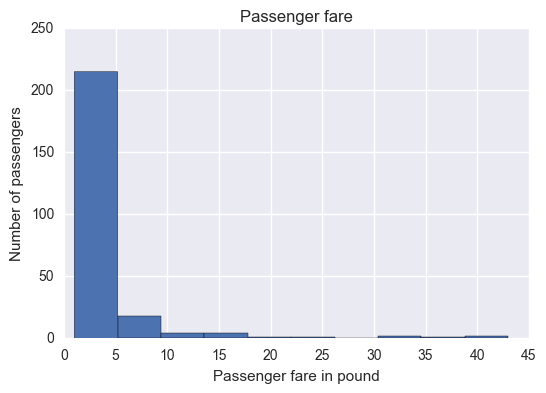

In [12]:
print "Mean passenger fare: %.2f pound" % ( fulldata["Fare"].mean())

# Plot fares
ax = fulldata.groupby("Fare").count()["PassengerId"].hist()
ax.set_ylabel("Number of passengers")
ax.set_xlabel("Passenger fare in pound")
ax.set_title("Passenger fare")

The mean passenger fare is 32.20 pound. 

In [13]:
# Describe data in column
print fulldata["Cabin"].describe()

# Print first rows of column "Cabin"
print fulldata["Cabin"].head()

# Count number of passengers without an assigned cabin
n_cabin_missing = fulldata["Cabin"].isnull().sum()

print "Passengers without cabin in data:", n_cabin_missing
print "Passengers with cabin in data:", n_passengers - n_cabin_missing

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object
0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object
Passengers without cabin in data: 687
Passengers with cabin in data: 204


For only 204 of the passengers a cabin is provided in the data.

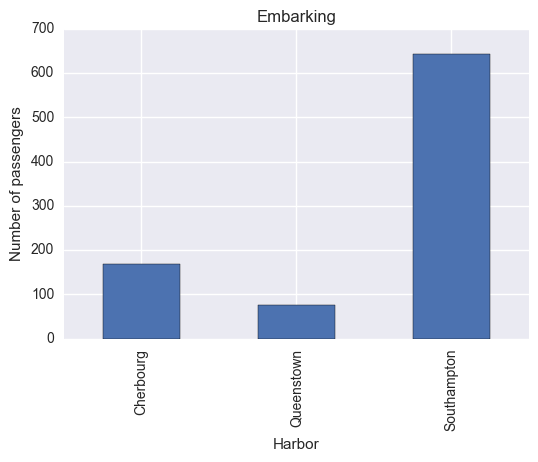

In [14]:
# Plot harbor of embarking
n_per_harbor = fulldata.groupby("Embarked", as_index=False).count()[["PassengerId", "Embarked"]]
def setHarbor(embark):
    harborFromEmbark = {"C":"Cherbourg", "Q":"Queenstown", "S":"Southampton"}
    return harborFromEmbark[embark]

n_per_harbor["Harbor"]=n_per_harbor["Embarked"].apply(setHarbor)
n_per_harbor.set_index("Harbor", inplace=True)

ax = n_per_harbor.plot.bar()
ax.set_title("Embarking")
ax.set_ylabel("Number of passengers")
ax.set_xlabel("Harbor")
ax.legend_.remove()

For few passengers the habro of embarking is missing in the data. Most of the passengers embarked in Southampton (72 %). The fewest embarked in Queenstown (9 %). 

# Data Cleaning and Enhancement
Some ages of the passengers are missing. During the rest of the analysis I keep that in mind but I do not want to give those people default ages since this would have an impact on calculated statistics.

For two passengers the harbour of embarking is missing. Since, according to [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic), the Titanic just stopped in the mentioned three harbours, it might be possible to estimate the harbour of embarking from the fare or the ticket number.

Since only 204 passengers have an assigned cabin and I do not have more information on e.g. the position of the cabins I leave the missing cabins as they are, also because none of the posed questions requires this inforamtion to be answered.

I also want to extract family names from the passenger names.

To get some Ideas on how to clean the data I had a look at https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic.

It seems to be the case, that the given fare is the full ticket price and not the ticket price per person. To correct for this I divide by the number of persons on the given ticket.

There are still some high ticket prices for some passengers in the third class. This might be due to the fact, that the dataset does not contain data on all passengers. Therefore, the conclusions about the distribution of passenger fares have to be handled with care.

In [15]:
fulldata[fulldata["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
fulldata[fulldata["Ticket"].isin(map(str, range(113000,114000)))].sort_values(by="Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
331,332,0,1,"Partner, Mr. Austen",male,45.50,0,0,113043,28.5000,C124,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.00,0,0,113050,26.5500,B38,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.00,0,0,113055,26.5500,E17,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S


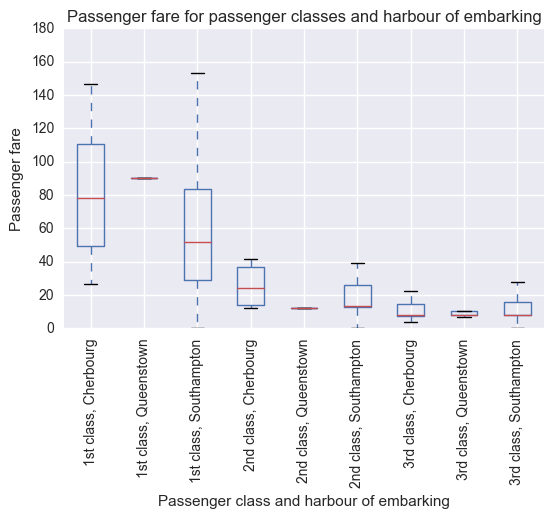

In [17]:
ax = fulldata.boxplot(column="Fare", by=["Pclass", "Embarked"])
ax.set_ylim(0,180)
ax.set_xticklabels(["1st class, Cherbourg", "1st class, Queenstown", "1st class, Southampton", "2nd class, Cherbourg", "2nd class, Queenstown", "2nd class, Southampton", "3rd class, Cherbourg", "3rd class, Queenstown", "3rd class, Southampton"],\
                  rotation=90)
ax.set_xlabel("Passenger class and harbour of embarking")
ax.set_ylabel("Passenger fare")
ax.set_title("Passenger fare for passenger classes and harbour of embarking")
#ax.set_subtitle()
plt.suptitle("")


Unfortunatly, the ticket number and also the passenger fare do not allow to extrapolate the harbour of embarking for the two passengers. The distrubtion of fares overlap for all harbours and the ticket number does not imply one of the three possible harbours. I will therfore leave the harbour of embarking missing for the two passengers and ignore them when calculating statistics for the according variable. Since only two of 891 passengers are affected, the impact will be small.

## Family names

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object
0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object
           PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
Surname                                                                  
Andersson            9         9       9     9    9    9      9      9   
Sage                 7         7       7     7    7    0      7      7   
Skoog                6         6       6     6    6    6      6      6   
Carter               6         6       6     6    6    6      6      6   
Goodwin              6         6       6     6    6    6      6      6   

           Ticket  Fare  Cabin  Embarked  Title  
Surname                                          
Andersson       9     9      0         9      9  
Sage            7     7      0         7      7  
Skoog           6     6      0         6      6  
Carter          6     6      4         6     

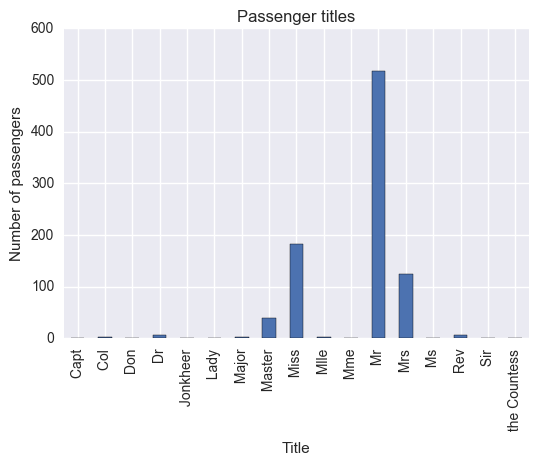

In [18]:
data_wrangled = fulldata
data_wrangled["Surname"] = data_wrangled["Name"].apply(lambda name: name.split(",")[0])
print data_wrangled["Surname"].head()
data_wrangled["Title"] = data_wrangled["Name"].apply(lambda name: name.split(",")[1].split(".")[0])
print data_wrangled["Title"].head()

ax = data_wrangled.groupby("Title").count()["PassengerId"].plot.bar()
ax.set_xlabel("Title")
ax.set_ylabel("Number of passengers")
ax.set_title("Passenger titles")

print data_wrangled.groupby("Surname").count().sort_values("PassengerId", ascending=False).head()

As the bar plot for the titles do not contain strange titles it seems that the extraction of titles from the fullname worked. Surnames and titles could now be used for analysis.

## Calculate family size

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Familysize
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Master,11
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,11
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,11
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,11
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,11


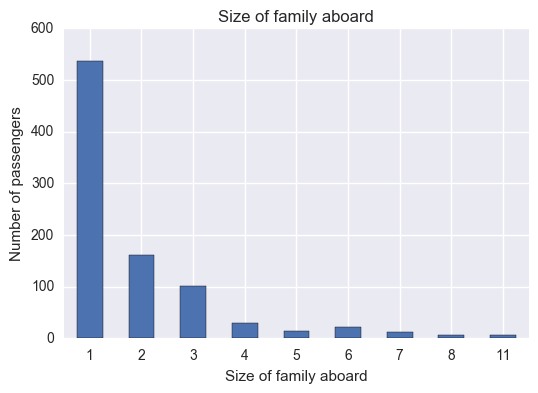

In [19]:
# Add number of parents, children, siblings and spouse and add one to account for the passenger himself
data_wrangled["Familysize"] = data_wrangled["Parch"] + data_wrangled["SibSp"] + 1

# investigate the new column
ax = data_wrangled.groupby("Familysize").count()["PassengerId"].plot.bar()
ax.set_ylabel("Number of passengers")
ax.set_xlabel("Size of family aboard")
ax.set_title("Size of family aboard")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show first entries
data_wrangled[data_wrangled["Familysize"]==11].head()

## Shortcoming in the data
First of all, the data contains only a subsample of the Titanic passengers. It is not clear if the sample has been obtained by random sampling or not. Therefore, conclusion that has been drawn on this subsample cannot be extended to the full population without further information.

Also, there is no information on the crew in this dataset. It seems, that the crew is not part of this dataset, but I cannot state that with absolute certainty.

The data description does not contain any information about the currency of the fares and how they might have been converted or even if to a reference currency. Some people share the same ticket number and it is not clear, whether the fare provided is a per ticket or a per passenger fare.

For only very few passengers the cabins are provided. Therefore, these cannot be taken into account for further analyses.

# Answering the questions
## Fares for different passenger classes

I plot the fare also with a logarithmic x axis to cover a wide region of fares while simultaneously differenciating smaller fares.

Mode of fares for 1st class: 46.86
Mode of fares for 2nd class: 20.34
Mode of fares for 3rd class:  6.68

Mean fares for passenger classes
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Mean fares for passenger classes
Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64


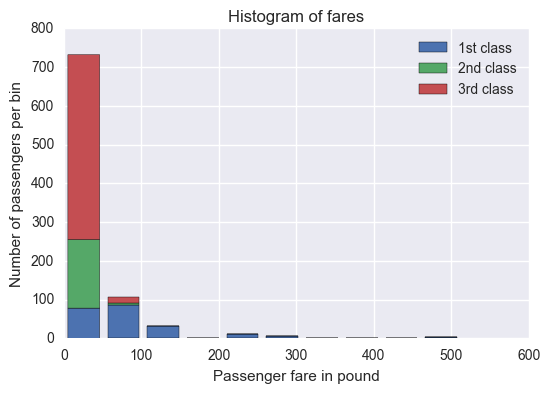

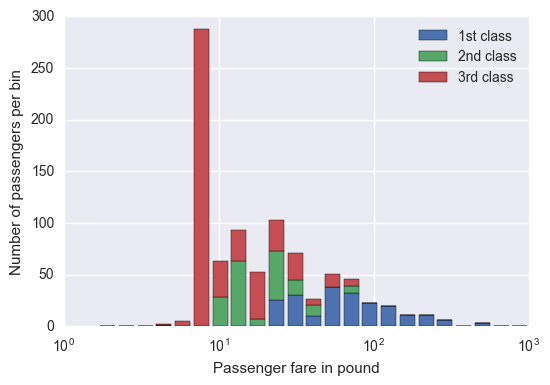

In [20]:
# Extract fares for the three passenger classes
fare_class_1 = data_wrangled[data_wrangled["Pclass"]==1]["Fare"]
fare_class_2 = data_wrangled[data_wrangled["Pclass"]==2]["Fare"]
fare_class_3 = data_wrangled[data_wrangled["Pclass"]==3]["Fare"]

# Plot fares
plt.title('Histogram of fares')
plt.xlabel("Passenger fare in pound")
plt.ylabel("Number of passengers per bin")
plt.hist([fare_class_1, fare_class_2, fare_class_3], stacked=True, label=["1st class", "2nd class", "3rd class"])
plt.legend()
plt.figure()

# Plot fares on a logrithmix x-axis
a,b,c = plt.hist([fare_class_1, fare_class_2, fare_class_3], stacked=True, \
         bins=np.logspace(0.1,3, 25), label=["1st class", "2nd class", "3rd class"])
plt.gca().set_xscale("log")
plt.xlabel("Passenger fare in pound")
plt.ylabel("Number of passengers per bin")
plt.legend()

# Print out the modes for the logarithmic histogram
print "Mode of fares for 1st class:", "%5.2f" % (b[a[0].argmax()])
print "Mode of fares for 2nd class:", "%5.2f" % (b[a[1].argmax()])
print "Mode of fares for 3rd class:", "%5.2f" % (b[a[2].argmax()])
print
print "Mean fares for passenger classes"
print data_wrangled.groupby("Pclass").mean()["Fare"]
print
print "Mean fares for passenger classes"
print data_wrangled.groupby("Pclass").median()["Fare"]

I conclude that the ticket price for the 3rd class started at 3.70 pound, but are mostly just around 8 pounds. Tickets for the 2nd class costed around 14 pounds. Ticket prices for the first class cover a wide range starting from 20 pounds to over 150 pounds. Surprisingly the ticket prices for the different classes overlap largely. This might be due an artifact in the data because ticket prices are not provided on a per passenger basis.

## Sex and Survival
At first, I want to have a look at the number of survivors and victims per sex absolutly as well a relativly.

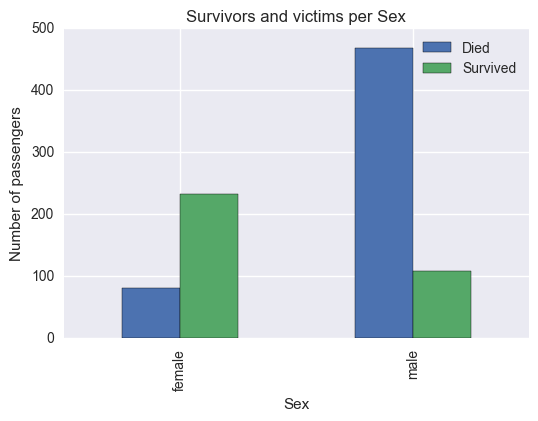

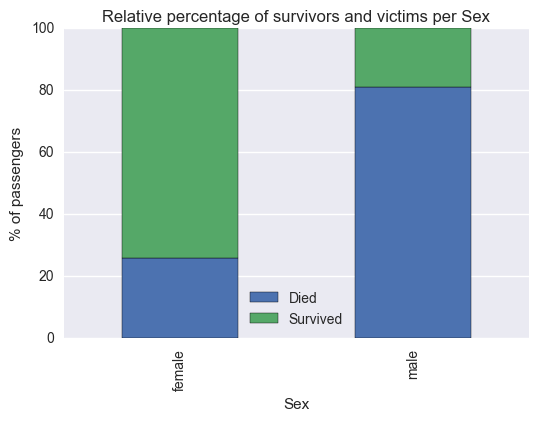

In [21]:
# Function to plot absolute numbers and precentages of survivors and victims in given classes defined by column colname
def plotSurvivalFor(colname):
    df = data_wrangled[["Survived", colname, "PassengerId"]].groupby(["Survived", colname]).count().unstack("Survived",fill_value=0)
    df.columns=["Died", "Survived"]
    ax = df[[0,1]].plot(kind="bar")
    ax.set_title("Survivors and victims per {}".format(colname))
    ax.set_ylabel("Number of passengers")
    
    erg = df.apply(lambda row: row*100./float(sum(row)), axis=1)
    ax = erg[[0,1]].plot(kind="bar", stacked=True)
    ax.set_ylabel("% of passengers")
    ax.set_title("Relative percentage of survivors and victims per {}".format(colname))

plotSurvivalFor("Sex")


From the plots it seems that female passengers had a higher survival rate than others. Most of the men died, while more than 70% of the women survived. 

To test my intuition, I conduct a [chi-square test for independence](http://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP). The alpha i choose for this test is .05.

My hypthoses are
H0: Sex and survival are independent. 
Ha: Sex and survival are not independent.

Since there are 2 possible values for sex in this dataset and also two possible values for the survival categorie (died or survived) the number of degreed of freedom for this test is (2-1)(2-1)=1.

In [22]:
# Calculate some figures needed to calculate the chi square value
n_per_sex = data_wrangled.groupby("Sex").count()["PassengerId"]
n_male = n_per_sex.loc["male"]
n_female = n_per_sex.loc["female"]

print "Female passengers:", n_female
print "Male passengers:", n_male

n_male_survivors = data_wrangled.groupby(["Sex", "Survived"]).count()["PassengerId"].loc["male", 1]
n_female_survivors = data_wrangled.groupby(["Sex", "Survived"]).count()["PassengerId"].loc["female", 1]
n_male_victims = data_wrangled.groupby(["Sex", "Survived"]).count()["PassengerId"].loc["male", 0]
n_female_victims = data_wrangled.groupby(["Sex", "Survived"]).count()["PassengerId"].loc["female", 0]

print "Female survivors:", n_female_survivors
print "Male survivors:", n_male_survivors
print "Female victims:", n_female_victims
print "Male victims:", n_male_victims

n_per_survival = data_wrangled.groupby("Survived").count()["PassengerId"]
n_survived = n_per_survival.loc[1]
n_died = n_per_survival.loc[0]

print "Survivors:", n_survived
print "Victims:", n_died

n_passengers = len(data_wrangled)

print "Passengers in sample:", n_passengers

E_male_survived = 1.* n_male * n_survived / n_passengers
E_female_survived = 1.* n_female * n_survived / n_passengers

print "Estimated male survivors given equal chance:", E_male_survived
print "Estimated female survivors given equal chance:", E_female_survived

E_male_died = 1.* n_male * n_died / n_passengers
E_female_died = 1.* n_female * n_died / n_passengers

print "Estimated male victims given equal chance:", E_male_died
print "Estimated female victims given equal chance:", E_female_died


Female passengers: 314
Male passengers: 577
Female survivors: 233
Male survivors: 109
Female victims: 81
Male victims: 468
Survivors: 342
Victims: 549
Passengers in sample: 891
Estimated male survivors given equal chance: 221.474747475
Estimated female survivors given equal chance: 120.525252525
Estimated male victims given equal chance: 355.525252525
Estimated female victims given equal chance: 193.474747475


In [23]:
# Calculate chi square value
chi2_value = (n_male_survivors - E_male_survived)**2./E_male_survived +\
(n_female_survivors - E_female_survived)**2./E_female_survived +\
(n_male_victims - E_male_died)**2./E_male_died +\
(n_female_victims - E_female_died)**2./E_female_died 
print chi2_value


263.050574071


In [24]:
# Convert chi squared value to probability
from scipy.stats import chi2
print 1-chi2.cdf(chi2_value, 1)

0.0


The calculated chi squared value for the chi squared test of indepence is so huge (263), that the probability to obtain such a large chi squared value is approximately 0 for 1 degree of freedom. Therefore, the null hypothesis that the survival did not depend on the passengers sex has to be rejected.